In [61]:
# First let's import the packages I will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now I need to read in the data
df = pd.read_csv(r'C:\Users\admin\Desktop\movies.csv')

In [8]:
# Now let's take a look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [9]:
# I need to see if I have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [13]:
# Let's drop all the rows that have missing data.

df = df.dropna()

In [14]:
# I need to see if I have any missing data after I dropped those rows
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [ ]:
# All the rows that had missing data are gone

In [15]:
# Data Types for my columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [17]:
# Convert specific columns to integer type
df[['votes', 'budget', 'gross', 'runtime']] = df[['votes', 'budget', 'gross', 'runtime']].astype(int)


In [19]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.      146  
1   58853106   Columbia Pictures      104  
2  538375067           Lucasfilm      124  
3   83453539  Paramount Pictures       88  
4   39846344      Orion Pictures       98

In [23]:
# Create year correct column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score    votes  \
0     1980      June 13, 1980 (United States)    8.4   927000   
1     1980       July 2, 1980 (United States)    5.8    65000   
2     1980      June 20, 1980 (United States)    8.7  1200000   
3     1980       July 2, 1980 (United States)    7.7   221000   
4     1980      July 25, 1980 (United States)    7.3   108000   
...    ...                                ...    ...      ...   
7648  2020   January 17, 2020 (United States)    6.6   140000   
7649  2020  February 14, 2020 (United States)    6.5   102000   
7650  2020   January 17, 2020 (United States)    5.6    53000   
7651  2020  February 21, 2020 (United States)    6.8    42000   
7652  2020    August 28, 2020 (United States)    6.8     3700   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  yearcorrect  
0                            Warner Bros.      146         1980  
1                       Columbia Pictures      104         1980  
2                               Lucasfilm      124         1980  
3                      Paramount Pictures       88         1980  
4                          Orion Pictures       98         1980  
...                                   ...      ...          ...  
7648                    Columbia Pictures      124         2020  
7649                   Paramount Pictures       99         2020  
7650                   Universal Pictures      101         2020  
7651                 20th Century Studios      100         2020  
7652  Beijing Diqi Yinxiang Entertainment      149         2020  

[5421 rows x 16 columns]

In [36]:
# Order my Data a little bit to see

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [26]:
pd.set_option('display.max_rows', None)

In [60]:
# I need to see if I have any duplicated data, and drop the duplicates
df.drop_duplicates()

name  rating  genre  year  released  score    votes  director  writer  \
6663  3643       5      0  2015       529    7.8   876000       768    1806   
7244   389       5      0  2018       145    8.4   897000       105     513   
7480  4388       4      2  2019      1126    6.9   222000      1012    1361   
6653  2117       5      0  2015      1303    7.0   593000       335    2523   
6043  3878       5      0  2012      1899    8.0  1300000      1060    1646   
6646  1541       5      0  2015       165    7.1   370000       809     481   
7494  1530       4      2  2019      2053    6.8   148000       277    1383   
6644   387       5      0  2015      1712    7.3   777000      1060    1646   
7247   567       5      0  2018       723    7.3   661000      1716    2687   
5845  1731       5      1  2011      1092    8.1   790000       452    2862   
7075  3644       5      0  2017       500    7.0   581000      1589    2487   
7271  2118       5      0  2018      1384    6.2   277000       764     777   
6262  1529       4      2  2013      2082    7.4   585000       277    1383   
7072   477       4      7  2017      1561    7.1   283000       155    2822   
7281  1966       4      2  2018      1325    7.6   263000       193     327   
7055  4119       5      0  2017        45    6.6   214000       567    1013   
6244  2014       5      0  2013      1881    7.1   779000      1767     837   
6688  2545       4      2  2015      1050    6.4   218000      1144     362   
6846   750       5      0  2016      1910    7.8   694000       105     513   
7250   343       5      0  2018       565    6.9   404000       809     699   
4245  4407       5      0  2003       516    8.9  1700000      1520    1238   
7458  3595       5      0  2019      1136    7.5   359000      1019     479   
7456   755       5      0  2019      1697    6.8   478000        96     182   
5878  4950       5      0  2011      1442    6.2   390000      1302     886   
6059  3498       5      0  2012      2148    7.7   642000      1732    2221   
6494  4949       5      0  2014      1424    5.6   302000      1302     886   
2448  4388       1      2  1994      1394    8.5   970000      1685    1206   
6047  4048       5      0  2012      1144    8.4  1600000       317    1606   
7463  3640       5      0  2019       553    6.5   394000       768     489   
7450  2091       6      5  2019      2321    8.4  1000000      1937    2998   
7488  4936       1      2  2019      1372    7.7   217000      1052    1525   
5685  4935       1      2  2010      1345    8.2   776000      1162    1525   
4852  2985       5      0  2006      1255    7.3   668000       674    2927   
6869  3260       5      0  2016       509    7.8   572000       615     492   
7481   206       4      1  2019      1837    6.9   239000       705    1468   
5860  2988       5      0  2011      1803    6.6   492000      1635    2927   
7140  1102       4      2  2017      1464    6.3   119000      1144     524   
2245  2115       5      0  1993      1292    8.1   894000      1859    2070   
6908  1411       4      2  2016      1339    7.3   250000        81     153   
3451  3637       4      0  1999      1778    6.5   748000       653    1046   
5667   215       4      1  2010      1679    6.4   392000      1918    1849   
6863  5329       4      2  2016      1673    8.0   450000       239     390   
6045  4240       5      1  2012       492    7.8   773000      1520     967   
3843  1736       4      1  2001      1987    7.6   685000       280    1236   
5243  4047       5      0  2008      1116    9.0  2400000       317    1606   
6311  1101       4      2  2013      1218    7.3   377000      1556     524   
6905  4322       4      1  2016        53    7.4   264000      1012    1671   
7051  2107       5      0  2017       551    6.9   336000       778     479   
6455  4241       5      1  2014       519    7.4   487000      1520     967   
5060  2987       5      0  2007      1844    7.1   60800

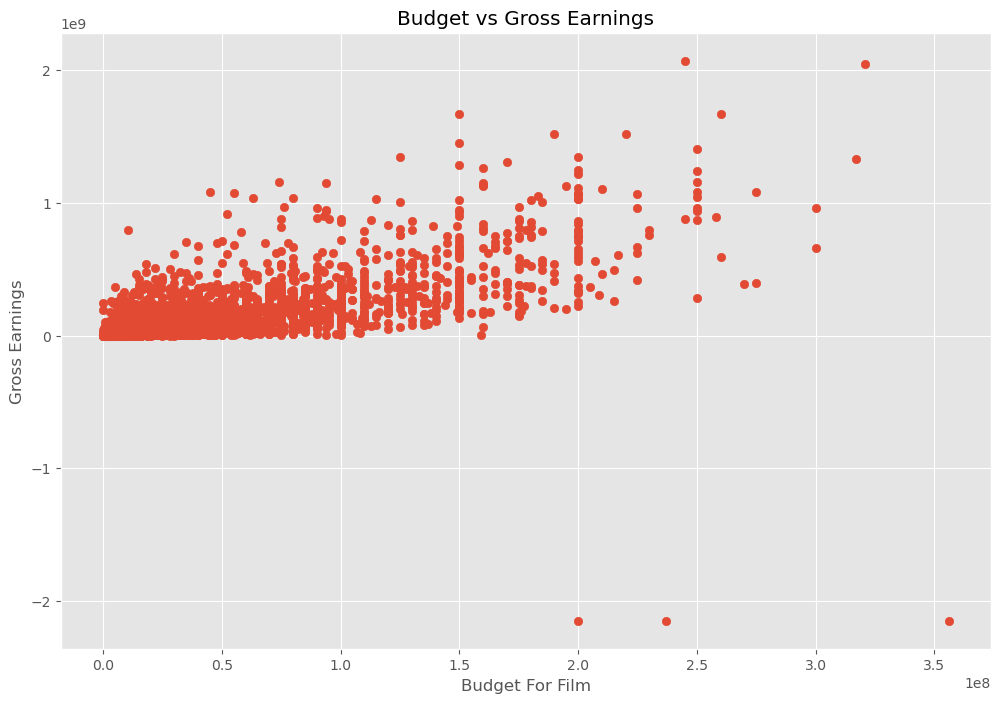

In [34]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget For Film')

plt.ylabel('Gross Earnings')

plt.show()
            

In [37]:
df.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score    votes         director  \
6663  December 18, 2015 (United States)    7.8   876000      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000      Joss Whedon   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   

           gross               company  runtime  yearcorrect  
6663  2069521700             Lucasfilm      138         2015  
7244  2048359754        Marvel Studios      149         2018  
7480  1670727580  Walt Disney Pictures      118         2019  
6653  1670516444    Universal Pictures      124         2015  
6043  1518815515        Marvel Studios      143         2012

<Axes: xlabel='budget', ylabel='gross'>

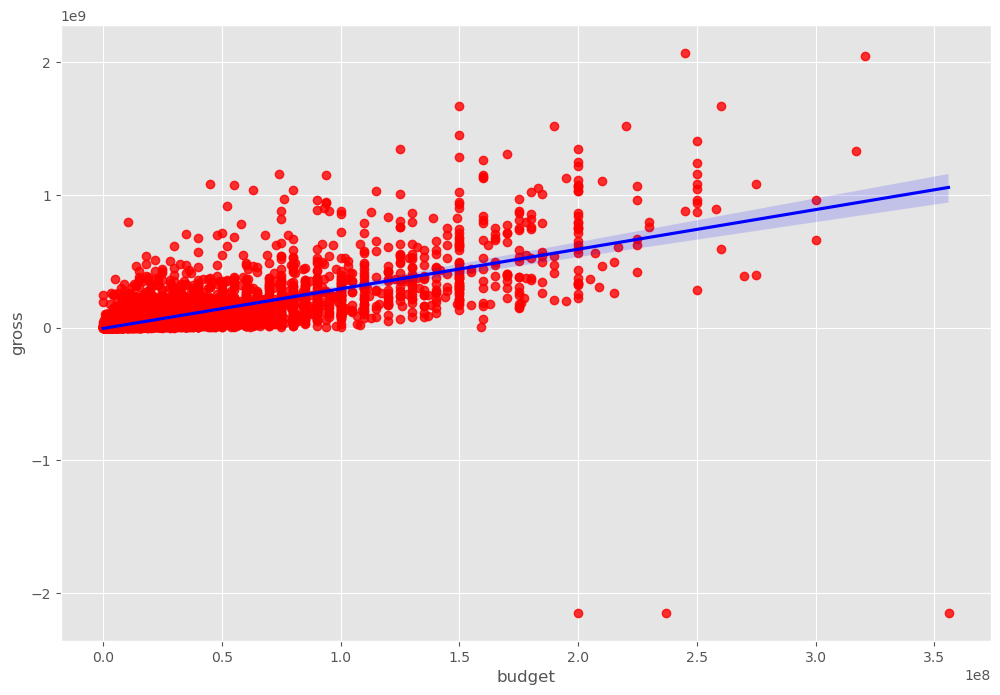

In [43]:
# Plot Budget vs Gross using seaborn

sns.regplot(x="budget", y="gross", data=df, scatter_kws={'color': 'red'}, line_kws={'color':'blue'})

In [46]:
# Correlation Matrix between all numeric columns

df.corr(method='pearson', numeric_only=True)

year     score     votes    budget     gross   runtime  \
year         1.000000  0.056386  0.206021  0.327722  0.267631  0.075077   
score        0.056386  1.000000  0.474256  0.072001  0.201086  0.414068   
votes        0.206021  0.474256  1.000000  0.439675  0.550649  0.352303   
budget       0.327722  0.072001  0.439675  1.000000  0.669203  0.318695   
gross        0.267631  0.201086  0.550649  0.669203  1.000000  0.223667   
runtime      0.075077  0.414068  0.352303  0.318695  0.223667  1.000000   
yearcorrect  0.998726  0.061923  0.203098  0.320312  0.262186  0.075294   

             yearcorrect  
year            0.998726  
score           0.061923  
votes           0.203098  
budget          0.320312  
gross           0.262186  
runtime         0.075294  
yearcorrect     1.000000

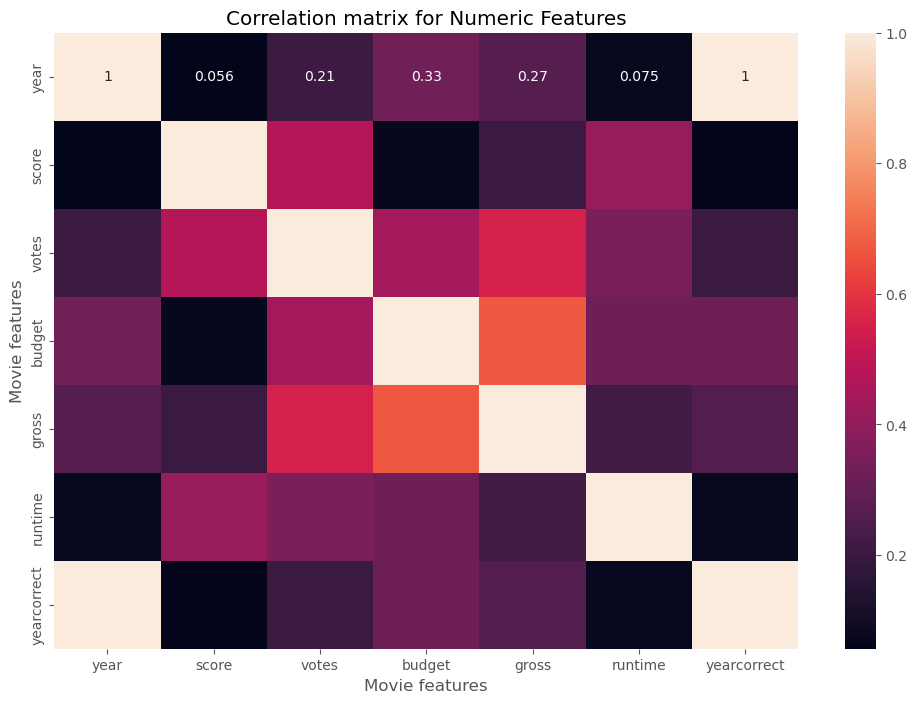

In [49]:
correlation_matrix = df.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [50]:
# Numerizing every column

df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score    votes  director  writer  \
6663  3643       5      0  2015       529    7.8   876000       768    1806   
7244   389       5      0  2018       145    8.4   897000       105     513   
7480  4388       4      2  2019      1126    6.9   222000      1012    1361   
6653  2117       5      0  2015      1303    7.0   593000       335    2523   
6043  3878       5      0  2012      1899    8.0  1300000      1060    1646   
6646  1541       5      0  2015       165    7.1   370000       809     481   
7494  1530       4      2  2019      2053    6.8   148000       277    1383   
6644   387       5      0  2015      1712    7.3   777000      1060    1646   
7247   567       5      0  2018       723    7.3   661000      1716    2687   
5845  1731       5      1  2011      1092    8.1   790000       452    2862   
7075  3644       5      0  2017       500    7.0   581000      1589    2487   
7271  2118       5      0  2018      1384    6.2   277000       764     777   
6262  1529       4      2  2013      2082    7.4   585000       277    1383   
7072   477       4      7  2017      1561    7.1   283000       155    2822   
7281  1966       4      2  2018      1325    7.6   263000       193     327   
7055  4119       5      0  2017        45    6.6   214000       567    1013   
6244  2014       5      0  2013      1881    7.1   779000      1767     837   
6688  2545       4      2  2015      1050    6.4   218000      1144     362   
6846   750       5      0  2016      1910    7.8   694000       105     513   
7250   343       5      0  2018       565    6.9   404000       809     699   
4245  4407       5      0  2003       516    8.9  1700000      1520    1238   
7458  3595       5      0  2019      1136    7.5   359000      1019     479   
7456   755       5      0  2019      1697    6.8   478000        96     182   
5878  4950       5      0  2011      1442    6.2   390000      1302     886   
6059  3498       5      0  2012      2148    7.7   642000      1732    2221   
6494  4949       5      0  2014      1424    5.6   302000      1302     886   
2448  4388       1      2  1994      1394    8.5   970000      1685    1206   
6047  4048       5      0  2012      1144    8.4  1600000       317    1606   
7463  3640       5      0  2019       553    6.5   394000       768     489   
7450  2091       6      5  2019      2321    8.4  1000000      1937    2998   
7488  4936       1      2  2019      1372    7.7   217000      1052    1525   
5685  4935       1      2  2010      1345    8.2   776000      1162    1525   
4852  2985       5      0  2006      1255    7.3   668000       674    2927   
6869  3260       5      0  2016       509    7.8   572000       615     492   
7481   206       4      1  2019      1837    6.9   239000       705    1468   
5860  2988       5      0  2011      1803    6.6   492000      1635    2927   
7140  1102       4      2  2017      1464    6.3   119000      1144     524   
2245  2115       5      0  1993      1292    8.1   894000      1859    2070   
6908  1411       4      2  2016      1339    7.3   250000        81     153   
3451  3637       4      0  1999      1778    6.5   748000       653    1046   
5667   215       4      1  2010      1679    6.4   392000      1918    1849   
6863  5329       4      2  2016      1673    8.0   450000       239     390   
6045  4240       5      1  2012       492    7.8   773000      1520     967   
3843  1736       4      1  2001      1987    7.6   685000       280    1236   
5243  4047       5      0  2008      1116    9.0  2400000       317    1606   
6311  1101       4      2  2013      1218    7.3   377000      1556     524   
6905  4322       4      1  2016        53    7.4   264000      1012    1671   
7051  2107       5      0  2017       551    6.9   336000       778     479   
6455  4241       5      1  2014       519    7.4   487000      1520     967   
5060  2987       5      0  2007      1844    7.1   60800

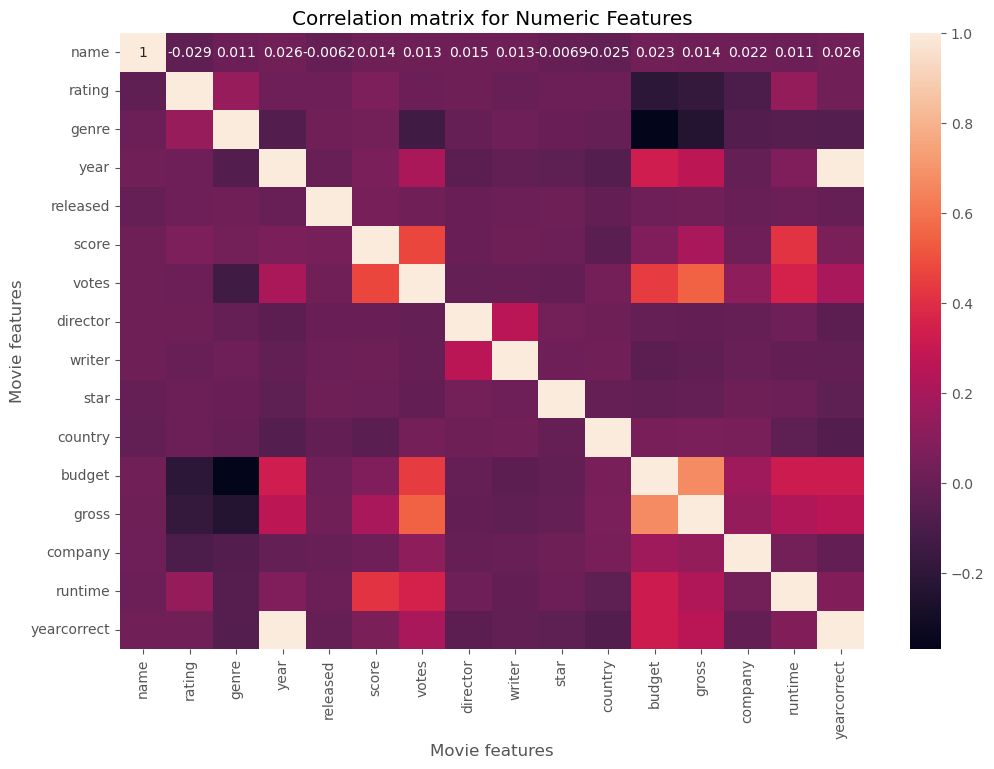

In [51]:
correlation_matrix = df_numerized.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [55]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating      -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre        0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year         0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released    -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score        0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes        0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director     0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer       0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star        -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country     -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget       0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross        0.014073 -0.180805 -0.238629  0.267631  0.025636  0.201086   
company      0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime      0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   
yearcorrect  0.025542  0.022021 -0.069147  0.998726 -0.005989  0.061923   

                votes  director    writer      star   country    budget  \
name         0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating       0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre       -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year         0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released     0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score        0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes        1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director    -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer      -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star        -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country      0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget       0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross        0.550649 -0.017821 -0.026665 -0.011854  0.055859  0.669203   
company      0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime      0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   
yearcorrect  0.203098 -0.037371 -0.025495 -0.032687 -0.073569  0.320312   

                gross   company   runtime  yearcorrect  
name         0.014073  0.021697  0.010850     0.025542  
rating      -0.180805 -0.092357  0.140792     0.022021  
genre       -0.238629 -0.071334 -0.059237    -0.069147  
year         0.267631 -0.014333  0.075077     0.998726  
released     0.025636 -0.002407  0.008975    -0.005989  
score        0.201086  0.020656  0.414068     0.061923  
votes        0.550649  0.118470  0.352303     0.203098  
director    -0.017821 -0.008223  0.017433    -0.037371  
writer      -0.026665 -0.003697 -0.017561    -0.025495  
star        -0.011854  0.014082  0.010108    -0.032687  
country      0.055859  0.048569 -0.034477    -0.073569  
budget       0.669203  0.170235  0.318695     0.320312  
gross        1.000000  0.140055  0.223667     0.262186  
company      0.140055  1.000000  0.037585    -0.018806  
runtime      0.223667  0.037585  1.000000     0.075294  
yearcorrect  0.262186 -0.018806  0.075294     1.000000

In [56]:
correation_mat = df_numerized.corr()

corr_pairs = correation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.014073
             company        0.021697
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [58]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.238629
genre        gross         -0.238629
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.180805
gross        rating        -0.180805
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
genre        yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [ ]:
high_corr = sorted_pairs[(sorted_pairs)> 0.5]

high_corr

In [ ]:
# Budget and votes have the highest correlation to Gross earnings